In [10]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Linear demand curve  $Q = a_d - b_d p$  

Linear supply curve  $Q = a_z + b_z (p  - t)$

Equilibrium price:

$a_d - b_d p = a_z + b_z (p  - t)$

$(a_d - a_z + b_z * t) / (b_d + b_z) = p$

Equilibrium quantity:

Inverse demand curve $p = (a_d - Q) / b_d$

Inverse supply curve $p = -(a_z - b_z * t - Q)/ b_z$

$(a_d - Q) / b_d = -(a_z - b_z * t - Q)/ b_z$

$Q (1/ b_d + 1/b_z) = a_d / b_d + (a_z - b_z * t) / b_z$


$Q (b_d + b_z) / (b_d * b_z) = a_d / b_d + (a_z - b_z * t) / b_z$


$Q^{*}  = (a_d / b_d + (a_z - b_z * t) / b_z) * (b_d * b_z) / (b_d + b_z)$

In [3]:
class Market:
    
    def __init__(self, ad, bd, az, bz, tax):
        
        """
        
        Set up a market parameters. All parameters are scalars
        
        """
        
        self.ad, self.bd, self.az, self.bz, self.tax = ad, bd, az, bz, tax
        if ad < az:
            raise ValueError('Insuffcient demand.')
            
    def price(self):
        "Compute equilibrium price"
        return (self.ad - self.az + self.bz * self.tax) / (self.bd + self.bz)
    
    def quantity(self):
        "Compute equilibrium quantity"
        return self.ad - self.bd * self.price()
    
    def consumer_surp(self):
        "Compute consumer surplus"
        # == Compute area under inverse demand function == #
        integrand = lambda x: (self.ad / self.bd) - (1 / self.bd) * x
        area, error = quad(integrand, 0, self.quantity())
        return area - self.price() * self.quantity()
    
    def producer_surp(self):
        "Compute producer surplus"
        #  == Compute area above inverse supply curve, excluding tax == #
        integrand = lambda x: -(self.az / self.bz) + (1/self.bz) * x
        area, error = quad(integrand, 0, self.quantity())
        return (self.price() - self.tax) * self.quantity() - area
    
    def taxrev(self):
        "Compute tax revenue"
        return self.tax * self.quantity()
    
    def inverse_demand(self, x):
        "Compute inverse demand"
        return self.ad / self.bd - (1 / self.bd) * x
    
    def inverse_supply(self, x):
        "Compute inverse supply curve"
        return -(self.az / self.bz) + (1 / self.bz) * x + self.tax
    
    def inverse_supply_no_tax(self, x):
        "Compute inverse supply curve without tax"
        return -(self.az / self.bz) + (1 / self.bz) * x
        
        

In [4]:
# try class
baseline_params = 15, .5, -2, .5, 3
m = Market(*baseline_params)
print("equilibrium price = ", m.price())

equilibrium price =  18.5


In [5]:
print("consumer surplus = ", m.consumer_surp())

consumer surplus =  33.0625


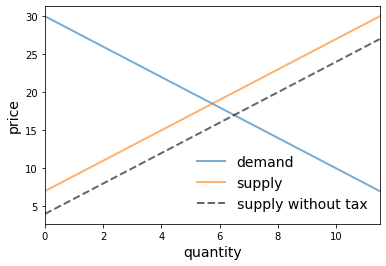

In [11]:
# Baseline ad, bd, az, bz, tax

q_max = m.quantity() * 2
q_grid = np.linspace(0.0, q_max, 100)
pd = m.inverse_demand(q_grid)
ps = m.inverse_supply(q_grid)
psno = m.inverse_supply_no_tax(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demand')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='supply')
ax.plot(q_grid, psno, "--k", lw=2, alpha=0.6, label='supply without tax')
ax.set_xlabel('quantity', fontsize=14)
ax.set_xlim(0, q_max)
ax.set_ylabel('price', fontsize=14)
ax.legend(loc='lower right', frameon=False, fontsize=14)
plt.show()

In [12]:
def deadw(m):
    "Computes deadweight loss for market m."
    # == Create analogous market with no tax == #
    m_no_tax = Market(m.ad, m.bd, m.az, m.bz, 0)
    # == Compare surplus, return difference == #
    surp1 = m_no_tax.consumer_surp() + m_no_tax.producer_surp()
    surp2 = m.consumer_surp() + m.producer_surp() + m.taxrev()
    return surp1 - surp2

In [13]:
deadw(m)  # Show deadweight loss

1.125

In [14]:
class Foo:
    def __len__(self):
        return 42

In [15]:
f = Foo()
len(f)

42

In [16]:
class Foo:
    def __call__(self, x):
        return x + 42

In [17]:
f = Foo()
f(8)

50

In [ ]:
# Exercise 1
from random import uniform